# importing basic libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1=pd.read_excel('meditation.xlsx')
df2=pd.read_excel('playlist1.xlsx')

In [3]:
df1=df1.drop('playlist',axis=1)

# preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder 
enc=LabelEncoder()
df3=np.ravel(df2)
dfnew=enc.fit_transform(df3)

In [6]:
df1['playlist']=dfnew

In [7]:
dfnew
#4:- soothing,2:- happy,3:-relaxing,1:-focused,0:- calm

array([0, 4, 0, 0, 3, 2, 2, 4, 1, 2, 4, 1, 0, 4, 2, 0, 0, 0, 3, 2, 2, 4,
       4, 0, 1, 0, 0, 4, 1, 4, 0, 3, 1, 1, 3, 4, 3, 0, 0, 2, 0, 2, 4, 1,
       3, 0, 1, 1])

In [8]:
df1.isnull().sum()

id              0
anxiety         0
overthinking    0
sleep           0
confused        0
meditation      0
positivity      0
feel_happy      0
playlist        0
dtype: int64

In [9]:
df1.head()

,id,anxiety,overthinking,sleep,confused,meditation,positivity,feel_happy,playlist
0,1,0,1,0,1,1,0,1,0
1,2,0,1,0,0,1,0,1,4
2,3,1,1,1,0,0,1,1,0
3,4,1,0,1,0,1,1,0,0
4,5,1,0,1,1,1,1,0,3


In [11]:
medit= df1.drop('id',axis=1)

In [12]:
medit.std()

anxiety         0.505291
overthinking    0.501328
sleep           0.483321
confused        0.503534
meditation      0.504852
positivity      0.494204
feel_happy      0.494204
playlist        1.540096
dtype: float64

# visulisation using heatmap

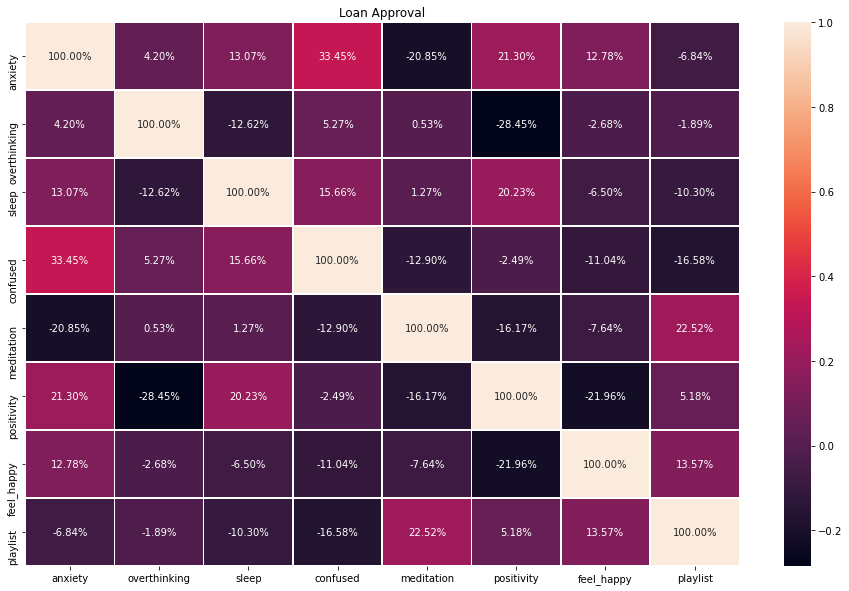

In [21]:
f,ax=plt.subplots(figsize=(16, 10)) 
sns.heatmap(medit.corr(),annot=True, linewidths=.5, fmt='.2%',ax=ax)
plt.title('Loan Approval')

plt.show()

# importing classifiers and basic metrics and preprocessor

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# you can choose standard scaler so as to increase your accuracy

In [34]:
sr=StandardScaler()
x=sr.fit_transform(X_train)
xt=sr.transform(X_test)

In [14]:
X=medit.drop('playlist',axis=1)
y=medit['playlist']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X.shape)
print(y.shape)

(48, 7)
(48,)


# using different classifiers and clustering techniques to identify the model's accuracy and prediction

In [39]:
mlpc=MLPClassifier(hidden_layer_sizes=(15,15,15),max_iter=10000)
mlpc.fit(X_train,y_train)
predictions=mlpc.predict(X_test) 
cm=accuracy_score(y_test,predictions)
print(cm)

0.2


In [19]:
nb=GaussianNB()
nb.fit(X_train,y_train)
predictions=nb.predict(X_test) 
cm1=accuracy_score(y_test,predictions)
print(cm1)

0.4


In [35]:
sr=svm.SVC()
sr.fit(x,y_train)
prediction=sr.predict(xt) 
cm3=accuracy_score(y_test,predictions)
cm3

0.3

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
neigh = KNeighborsRegressor(n_neighbors=1)           # if we take n_neighbors= 2 (than it give 98% accuracy) & 1 (than it give 100% accuracy)
neigh.fit(x,y_train)
predict_KNN=neigh.predict(xt)
print(predict_KNN.round())

[0. 0. 1. 0. 1. 0. 2. 3. 0. 4.]


In [38]:
neigh.score(x,y_train)

0.48884514435695536